## 8. Random Forest

A Random Forest is an ensemble of decision trees combined with bagging. When using bagging, what is really happening is that different trees see different portions of the data. No tree sees all the training data. This makes each tree train with different samples of data for the same problem. In this way, by combining their results, some errors are compensated with others and we have a prediction that generalizes better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb # XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(12345)
from sklearn.impute import KNNImputer

In [2]:
data1 = pd.read_csv('../data/modeldata.csv')
data = data1.drop('Unnamed: 0',1)
data

,application_type_Joint App,"('installment',)",term_ 60 months,"('dti',)","('fico_range_low',)","('acc_now_delinq',)","('num_rev_accts',)","('num_il_tl',)","('mo_sin_old_rev_tl_op',)","('num_sats',)",...,"('total_il_high_credit_limit',)","('int_rate',)","('total_acc',)","('loan_amnt',)",home_ownership_RENT,home_ownership_OWN,home_ownership_MORTAGE&OTHER,"('last_fico_range_high',)","('tot_cur_bal',)",paid
0,0,-0.066182,0,-0.076735,1.000000,0.0,1.8,0.625,0.982143,1.500000,...,2.167452,-0.9024,1.3750,-0.085417,0,1,0,0.318182,2.045887,0
1,0,-0.293676,0,-0.968163,0.000000,0.0,-1.1,-0.750,0.062500,-1.166667,...,-0.674537,1.8976,-1.1875,-0.450000,1,0,0,-0.181818,-0.416741,0
2,0,-0.457306,0,-0.392653,0.714286,0.0,0.1,0.125,-1.017857,1.333333,...,0.013921,-0.9024,0.1875,-0.425000,0,0,1,0.272727,1.109212,0
3,0,-0.424834,1,-0.638367,0.142857,0.0,0.3,-0.375,-0.991071,0.666667,...,-0.637968,0.4848,-0.1875,-0.216667,1,0,0,-0.272727,-0.386501,0
4,0,0.345384,0,-0.577143,0.000000,0.0,-0.8,-0.500,-0.607143,-1.166667,...,-0.032839,0.4848,-0.8750,0.116667,0,0,1,-0.045455,0.270862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462221,0,0.074068,0,0.746939,-0.142857,0.0,-0.1,-0.250,0.169643,-0.333333,...,-0.729001,0.4160,-0.3750,-0.085417,1,0,0,0.045455,-0.336689,0
462222,0,0.055234,0,0.470204,0.000000,0.0,0.6,4.125,0.607143,0.333333,...,1.620201,-0.1600,2.3125,-0.050000,0,0,1,-0.545455,0.886921,1
462223,0,-0.199753,1,1.058776,-0.142857,0.0,-0.4,0.625,-0.508929,-0.333333,...,0.038300,0.4800,-0.1250,0.033333,1,0,0,-1.090909,-0.255680,1
462224,0,-0.194217,1,0.755918,0.285714,0.0,0.2,-0.500,-0.732143,1.000000,...,0.932547,1.1200,-0.2500,-0.050000,1,0,0,-1.727273,-0.119125,1


In [3]:
endogena = ['paid'] 


exogenas = list(set(list(data.columns))-set(endogena))

X = data[exogenas].values
Y = data[endogena].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(386909, 22)
(92446, 22)


In [5]:
ytrain_df = pd.DataFrame(Y_train, columns = ['paid'])
ytest_df = pd.DataFrame(Y_test, columns = ['paid'])

In [6]:
ytrain_df['paid'].value_counts(normalize=True)

0    0.714287
1    0.285713
Name: paid, dtype: float64

In [7]:
ytest_df['paid'].value_counts(normalize=True)

0    0.74755
1    0.25245
Name: paid, dtype: float64

In [8]:
%%time
param_test1 = {
    'max_depth' : [4,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
 }
gsearch_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=-1, iid=False, cv=5)
gsearch_RandomForest.fit(X_train, Y_train)

C:\Users\34639\anaconda3\envs\lending\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Wall time: 1h 29min 46s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [9]:
%%time
gsearch_RandomForest2 = gsearch_RandomForest.best_estimator_
gsearch_RandomForest2.fit(X_train, Y_train)

Wall time: 9min 53s


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

In [10]:
Y_pred_gsearch_RandomForest2 = gsearch_RandomForest2.predict(X_test)

In [11]:
print(confusion_matrix(Y_test,Y_pred_gsearch_RandomForest2))
print(classification_report(Y_test,Y_pred_gsearch_RandomForest2))

[[63813  5295]
 [ 4030 19308]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     69108
           1       0.78      0.83      0.81     23338

    accuracy                           0.90     92446
   macro avg       0.86      0.88      0.87     92446
weighted avg       0.90      0.90      0.90     92446



We found 94% accuracy for those who will pay and 79% accuracy for those who will not pay.

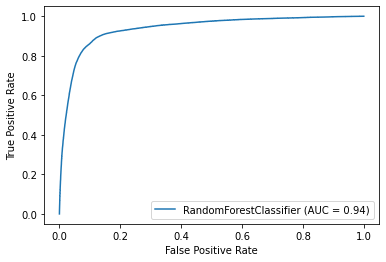

Random Forest score train:  0.8993225797280497
Random Forest score:  0.8991303030958614


In [12]:
metrics.plot_roc_curve(gsearch_RandomForest2, X_test, Y_test)
plt.show() 
print("Random Forest score train: ", gsearch_RandomForest2.score(X_train, Y_train))
print("Random Forest score: ", gsearch_RandomForest2.score(X_test, Y_test))

We have an Area Under the Curve(AUC) of 94%.

### Confussion Matrix

In [13]:
from sklearn.metrics import plot_confusion_matrix

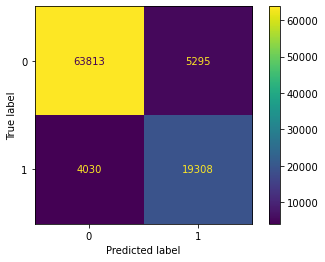

In [14]:
plot_confusion_matrix(gsearch_RandomForest, X=X_test, y_true=Y_test)

The values of the main diagonal a=63813 and d=19308 correspond to the values estimated correctly by the model, both the true positive_ TP(d), and the true negative_TN (a).

The other diagonal, therefore, represents the cases in which the model "made a mistake" (c=4030 false negatives_FN, b=19308 false positives_FP).

### Saving the model

In [1]:
import pickle

In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
filename = 'gsearch_RandomForest2.sav'
pickle.dump(gsearch_RandomForest2, open(filename, 'wb'))

In [ ]:
rf_model = pickle.load(open('gsearch_RandomForest2.sav', 'rb'))
rf_model

In [ ]:
a = rf_model.score(X_test, Y_test)
print("Acurracy : " , a*100)